
## 1) Importing the Packages


In [1]:
import tensorflow as tf
import numpy as np


## 2) Loading the Data

The original data comes [Face Images with Marked Landmark Points](https://www.kaggle.com/drgilermo/face-images-with-marked-landmark-points) on [Kaggle](https://www.kaggle.com/) by [Omri Goldstein](https://www.kaggle.com/drgilermo). In this dataset, the `facial_keypoints.csv` file contains the 15 keypoints for all images.

> *Certain images do not have all the 15 keypoints. So, I've cleaned the dataset and kept only those images which have all the 15 keypoints. See this [script](https://gist.github.com/shubham0204/7eb0435dc0142ce4fc560629111e0648) which was used to clean the dataset.*




In [2]:
!wget https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true -O data.zip
!unzip data.zip

--2021-03-19 11:10:55--  https://github.com/shubham0204/Dataset_Archives/blob/master/face_landmarks_cleaned.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip [following]
--2021-03-19 11:10:55--  https://github.com/shubham0204/Dataset_Archives/raw/master/face_landmarks_cleaned.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip [following]
--2021-03-19 11:10:55--  https://raw.githubusercontent.com/shubham0204/Dataset_Archives/master/face_landmarks_cleaned.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubuserco


We'll normalize the images as well as the keypoints. The shape of our input image will be  `( 96 , 96 , 1 )` and the expected output will have a shape of `( 1 , 1 , 30 )`. The output is from a `Conv2D` layer rather than the `Dense` layer.


In [3]:
x_train = np.load( "face_landmarks_cleaned/x_train.npy" ) / 255
y_train = np.load( "face_landmarks_cleaned/y_train.npy" ) / 96
x_test = np.load( "face_landmarks_cleaned/x_test.npy" ) / 255
y_test = np.load( "face_landmarks_cleaned/y_test.npy" ) / 96

y_train = np.reshape( y_train , ( -1 , 1 , 1 , 30 ))
y_test = np.reshape( y_test , ( -1 , 1 , 1 , 30 ))


## 3) The CNN Model

We'll build a CNN model which `Conv2D` layers. We do not include `Dense` and `MaxPooling2D` layers here. The output will always be a number in the interval [ 0 , 1 ] so we can use sigmoid activation.


In [4]:
model_layers = [ 
    tf.keras.layers.SeparableConv2D( 128 , input_shape=( 96 , 96 , 1 ) , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 128 , kernel_size=( 5 , 5 ) , strides=1 ),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 5 , 5 ) , strides=1),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation( 'relu' ) ,

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 64 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 3 , 3 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 32 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),

    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='relu' ),
    tf.keras.layers.SeparableConv2D( 30 , kernel_size=( 2 , 2 ) , strides=1 , activation='sigmoid' ),
]
model = tf.keras.Sequential( model_layers )
model.compile( loss=tf.keras.losses.mean_squared_error , optimizer=tf.keras.optimizers.Adam( lr=0.0001 ) , metrics=[ 'mse' ] )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d (SeparableC (None, 92, 92, 128)       281       
_________________________________________________________________
batch_normalization (BatchNo (None, 92, 92, 128)       512       
_________________________________________________________________
activation (Activation)      (None, 92, 92, 128)       0         
_________________________________________________________________
separable_conv2d_1 (Separabl (None, 88, 88, 128)       19712     
_________________________________________________________________
batch_normalization_1 (Batch (None, 88, 88, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 88, 88, 128)       0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 84, 84, 128)       1


## 4) Training the Model

We'll train the model for 150 epochs with a batch of 50.


In [5]:
model.fit( x_train , y_train , epochs=25 , batch_size=50 , validation_data=( x_test , y_test ) )

Epoch 1/25
30/30 [==============================] - 75s 1s/step - loss: 0.0386 - mse: 0.0386 - val_loss: 0.0382 - val_mse: 0.0382
Epoch 2/25
30/30 [==============================] - 30s 1s/step - loss: 0.0381 - mse: 0.0381 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 3/25
30/30 [==============================] - 31s 1s/step - loss: 0.0379 - mse: 0.0379 - val_loss: 0.0375 - val_mse: 0.0375
Epoch 4/25
30/30 [==============================] - 31s 1s/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 5/25
30/30 [==============================] - 30s 1s/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 6/25
30/30 [==============================] - 30s 1s/step - loss: 0.0363 - mse: 0.0363 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 7/25
30/30 [==============================] - 30s 1s/step - loss: 0.0360 - mse: 0.0360 - val_loss: 0.0354 - val_mse: 0.0354
Epoch 8/25
30/30 [==============================] - 31s 1s/step - loss: 0.0353 - mse: 0.03


## 5) Generate keypoints for images

We will generate keypoints for 15 images from our test dataset. These points are then plotted on the image.


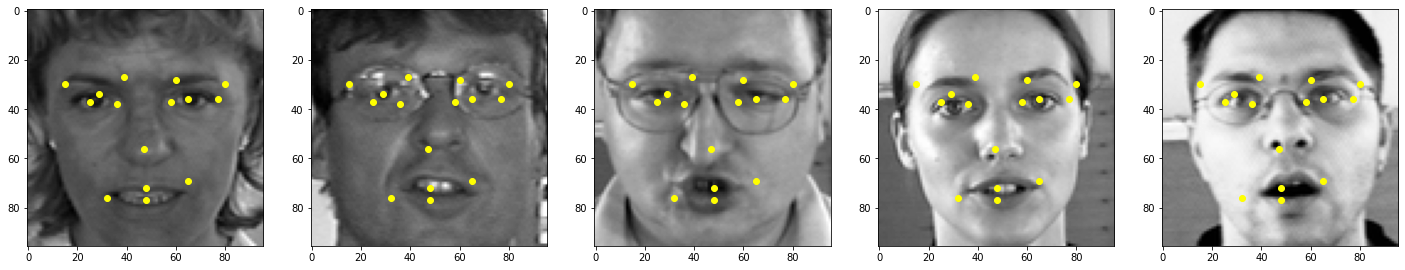

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=( 50 , 50 ))

for i in range( 1 , 6 ):
    sample_image = np.reshape( x_test[i] * 255  , ( 96 , 96 ) ).astype( np.uint8 )
    pred = model.predict( x_test[ i : i +1  ] ) * 96
    pred = pred.astype( np.int32 )
    pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )
    fig.add_subplot( 1 , 10 , i )
    plt.imshow( sample_image.T , cmap='gray' )
    plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
plt.show()


## 6) Take a Picture and Predict landmarks for it ( Just for Fun! )

We'll use this Colab snippet to take a picture from a webcam in your PC. Run the cell below first. See the [reference notebook](https://colab.research.google.com/notebooks/snippets/advanced_outputs.ipynb#scrollTo=2viqYx97hPMi).


In [7]:

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename




Run this code cell. You'll see a camera preview and a "*Capture*" button. Once you take a picture, it will be saved as `photo.jpg`.


<IPython.core.display.Javascript object>

Saved to photo.jpg


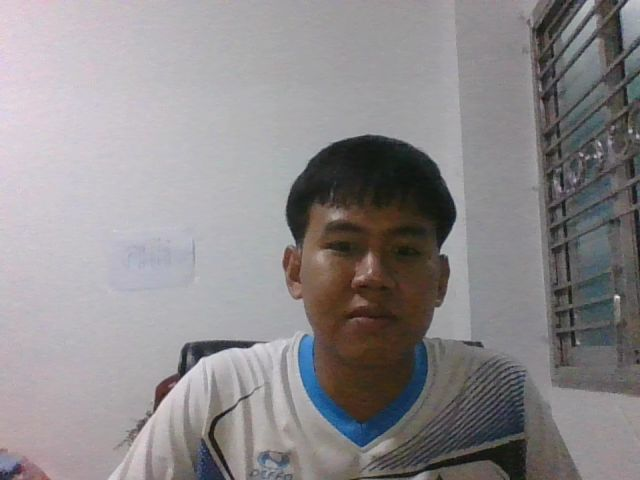

In [8]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


We'll read the `photo.jpg`, resize it `( 96 , 96 )` and feed it to our model. The predictions will then be plotted on the image.


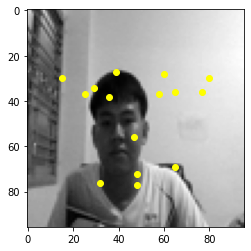

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open( "photo.jpg").convert('L').resize( ( 96 , 96 ) ).rotate( 90 )
image_arr = np.asarray( image ) / 255

pred = model.predict( np.array( [ image_arr.reshape( 96 , 96 , 1 ) ] ) ) * 96
pred = pred.astype( np.int32 )
pred = np.reshape( pred[0 , 0 , 0 ] , ( 15 , 2 ) )

plt.imshow( image_arr.T , cmap='gray' )
plt.scatter( pred[ : , 0 ] , pred[ : , 1 ] , c='yellow' )
plt.show()

You may convert the Keras model to a TensorFlow Lite model.

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model( model )
converter.optimizations = [tf.lite.Optimize.DEFAULT]
x_test = x_test.astype( np.float32 )
ds = tf.data.Dataset.from_tensor_slices(( x_test )).batch(1)
def representative_data_gen():
  for input_value in ds.take(100):
    yield [input_value]
converter.representative_dataset = representative_data_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

buffer = converter.convert()
open( 'model_sep.tflite' , 'wb' ).write( buffer )

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
print(interpreter.get_input_details()[0]['shape'])
print(interpreter.get_input_details()[0]['dtype'])

# Print output shape and type
print(interpreter.get_output_details()[0]['shape'])
print(interpreter.get_output_details()[0]['dtype'])